# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle

# TODO: Fill this in based on where you saved the training and testing data

training_file = '../data/train.p'
validation_file= '../data/valid.p'
testing_file = '../data/test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

In [2]:
# Check what else is included in the input files
X_sizes = train['sizes']
X_coords = train['coords']
print(X_sizes[956])
print(X_coords[956])

[60 61]
[ 5  5 54 55]


---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [3]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results

# TODO: Number of training examples
n_train = len(y_train)

# TODO: Number of validation examples
n_validation = len(y_valid)

# TODO: Number of testing examples.
n_test = len(y_test)

# TODO: What's the shape of an traffic sign image?
image_shape = X_train[0].shape

# TODO: How many unique classes/labels there are in the dataset.
n_classes = y_train.max() + 1

# Display sample sizes from training, validation, and testing sets.
# Also display image pixel size and number of classes.
print("Number of training examples =", n_train)
print("Number of validation examples =", n_validation)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of validation examples = 4410
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc. 

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections. It can be interesting to look at the distribution of classes in the training, validation and test set. Is the distribution the same? Are there more examples of some classes than others?

Image:  (32, 32, 3)
Label:  25


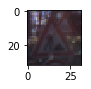

In [4]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
import random
import cv2
import numpy as np
# Visualizations will be shown in the notebook.
# Display a random image from the training set.
%matplotlib inline
index = random.randint(0, len(X_train))
image = X_train[index]
rows,cols,channels = image.shape
print('Image: ', image.shape)
print('Label: ', y_train[index])
plt.figure(figsize=(1,1))
plt.imshow(image)
plt.show()

In [5]:
# Method to plot bar chart
class_list = []
for i in range(n_classes):
    class_list.append(i)

def bar_chart(x, y, ylabel, title, xticks = True):
    plt.figure(figsize=(12,6))
    if xticks:
        plt.xticks(np.arange(min(y), max(y)+1, 1),fontsize=6)
    else:
        plt.xticks(fontsize=6)
    plt.bar(y, x, align='center', alpha=0.5)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.show()

In [6]:
# Method to list class counts in a data set
def class_count(y, qty, text):
    label_list = [0]*n_classes
    for i in range(qty):
        label_list[y[i]] += 1
    bar_chart(label_list, class_list, 'Count', text+' Set QTY by Class')
    return label_list

In [7]:
# Method to display specified number of images from specified class
def class_img_display(x, y, qty, img_class, text):
    print(text+' image samples:')
    count = 0
    for i in range(len(y)):
        if count == qty:
            break
        if y[i] == img_class:
            plt.figure(figsize=(1,1))
            plt.imshow(x[i])
            plt.show()
            count += 1

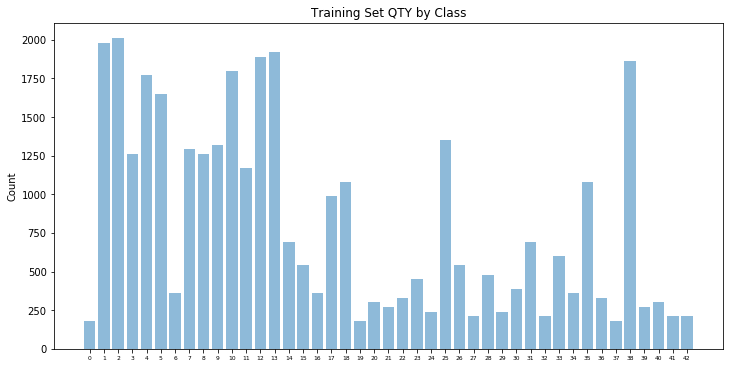

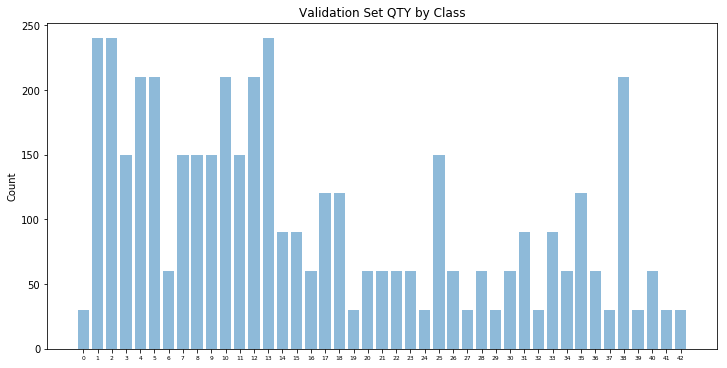

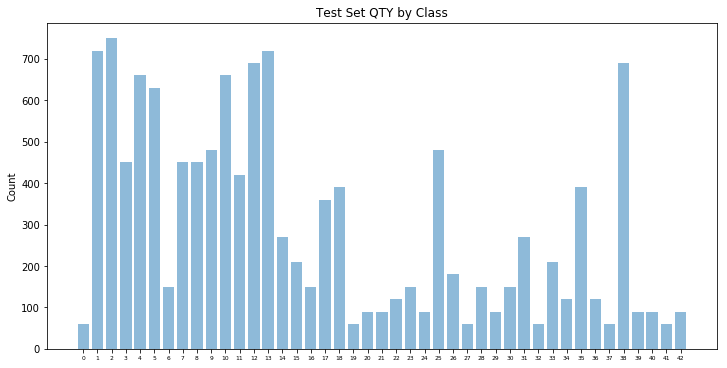

Training image samples:


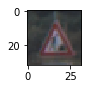

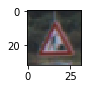

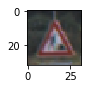

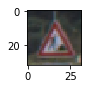

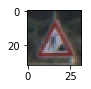

Validation image samples:


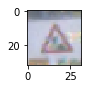

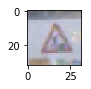

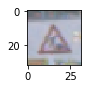

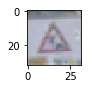

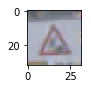

Test image samples:


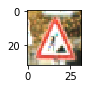

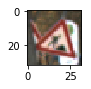

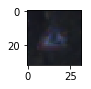

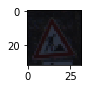

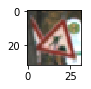

In [8]:
# List all set labels with counts
train_label_list = class_count(y_train, n_train, 'Training')
valid_label_list = class_count(y_valid, n_validation, 'Validation')
test_label_list = class_count(y_test, n_test, 'Test')

# Display images from certain class
class_img_display(X_train, y_train, 5, 25, 'Training')
class_img_display(X_valid, y_valid, 5, 25, 'Validation')
class_img_display(X_test, y_test, 5, 25, 'Test')


----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

Minimally, the image data should be normalized so that the data has mean zero and equal variance. For image data, `(pixel - 128)/ 128` is a quick way to approximately normalize the data and can be used in this project. 

Other pre-processing steps are optional. You can try different techniques to see if it improves performance. 

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

In [9]:
### Preprocess the data here. It is required to normalize the data. Other preprocessing steps could include 
### converting to grayscale, etc.
### Feel free to use as many code cells as needed.
# Define method to normalize image sets.
# Normalize to 0 - 1 instead of -1 to 1.  Channel independent.
def normalize_img(img_set):

    norm_set = np.float32(np.copy(img_set))
    for i in range(len(img_set)):
        #norm_set[i] = np.float32(img_set[i]/img_set[i].max)
        for j in range(3):
            norm_set[i][:,:,j] = np.float32(((img_set[i][:,:,j] - img_set[i][:,:,j].min()) / (img_set[i][:,:,j].max() - img_set[i][:,:,j].min())))
    return norm_set


In [10]:
# apply normalization to all sets.
# also display matrices of before and after normalization on a sample.
print('Before normalization:')
print(X_train[77][:,:,1])
X_train_norm = normalize_img(X_train)
X_valid_norm = normalize_img(X_valid)
X_test_norm = normalize_img(X_test)
print('After normalization:')
print(X_train_norm[77][:,:,1])

Before normalization:
[[51 36 45 ... 80 79 73]
 [47 34 38 ... 64 75 79]
 [45 32 38 ... 61 68 71]
 ...
 [43 38 34 ... 46 42 37]
 [44 36 31 ... 36 33 35]
 [41 36 38 ... 52 48 50]]
After normalization:
[[0.1849315  0.08219178 0.14383562 ... 0.38356164 0.37671232 0.33561644]
 [0.15753424 0.06849315 0.09589041 ... 0.2739726  0.34931508 0.37671232]
 [0.14383562 0.05479452 0.09589041 ... 0.25342464 0.30136988 0.3219178 ]
 ...
 [0.13013698 0.09589041 0.06849315 ... 0.15068494 0.12328767 0.0890411 ]
 [0.1369863  0.08219178 0.04794521 ... 0.08219178 0.06164384 0.07534247]
 [0.11643836 0.08219178 0.09589041 ... 0.19178082 0.16438356 0.1780822 ]]


In [11]:
# Data Augmentation
def augment_data(img, times):
    X_set = []
    height = img.shape[0]
    kernels = [None]*3
    for i in range(times):
        rand_binary = random.randint(0,1)
        rotate_random = random.uniform(-25, 25)
        x_random = random.randint(4, 25)
        y_random = random.randint(4, 25)
        x_move = random.randrange(-7, 8, 2)
        y_move = random.randrange(-7, 8, 2)
        brightness = random.uniform(0.2, 0.7)
        stretch = np.int32(random.randrange(24, 43, 2))
        padding = np.int32((stretch-height)/2)
        sharp_blur = random.randint(0, 2)
        sharpen_k = random.uniform(0.5, 3)
        gauss_k = random.uniform(0.5, 3)
        kernels[0] = np.array([[0,0,0], [0,1,0], [0,0,0]])
        kernels[1] = np.array([[0,-sharpen_k,0], [-sharpen_k,5*sharpen_k,-sharpen_k], [0,-sharpen_k,0]])
        kernels[2] = np.array([[1,2*gauss_k,1], [2*gauss_k,4*gauss_k,2*gauss_k], [1,2*gauss_k,1]])
        kernels[2] = kernels[2]/kernels[2].sum()
        MR = cv2.getRotationMatrix2D((cols/2,rows/2),rotate_random,1)
        M = np.float32([[1,0,x_move],[0,1,y_move]])
        
        # sharpen or smoothing
        temp = cv2.filter2D(img, -1, kernels[sharp_blur])
        
        # random rotate image
        temp = cv2.warpAffine(temp,MR,(cols,rows))
        
        # random stretch/squeeze image 
        temp = cv2.resize(temp,(stretch, height), interpolation = cv2.INTER_LINEAR)
        if stretch > height:
            temp = np.pad(temp, ((padding,padding),(0,0),(0,0)), 'constant')
        elif stretch < height:
            temp = np.pad(temp, ((0,0),(-padding,-padding),(0,0)), 'constant')
        temp = cv2.resize(temp,(height, height), interpolation = cv2.INTER_LINEAR)
        
        # random darken partial image
        if rand_binary == 0:
            if y_random < 15:
                temp[:y_random,:,:] = temp[:y_random,:,:] * brightness
            else:
                temp[y_random:,:,:] = temp[y_random:,:,:] * brightness
        else:
            if x_random < 15:
                temp[:,:x_random,:] = temp[:,:x_random,:] * brightness
            else:
                temp[:,x_random:,:] = temp[:,x_random:,:] * brightness
        
        # random move image
        temp = cv2.warpAffine(temp,M,(cols,rows))

        # normalize
        [temp] = normalize_img([temp])
        X_set.append(temp)
    return X_set

In [12]:
## augment data.
# desired number of samples per class
desired_sample = 4000
X_augment = []
y_augment = []
n_list = [0]*n_classes

# calculate number of images to duplicate 
for i in range(n_classes):
    n_list[i] = np.int32(round(desired_sample / train_label_list[i])) - 1
print(n_list)

# loop through entire training set and augment data using the n_list above
for i in range(n_train):
    img = X_train_norm[i]
    X_augment += augment_data(img, n_list[y_train[i]])
    y_augment += [y_train[i]] * n_list[y_train[i]]

[21, 1, 1, 2, 1, 1, 10, 2, 2, 2, 1, 2, 1, 1, 5, 6, 10, 3, 3, 21, 12, 14, 11, 8, 16, 2, 6, 18, 7, 16, 9, 5, 18, 6, 10, 3, 11, 21, 1, 14, 12, 18, 18]


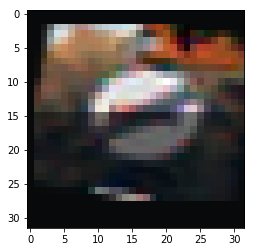

[[0.037768   0.037768   0.037768   ... 0.037768   0.037768   0.037768  ]
 [0.037768   0.037768   0.037768   ... 0.037768   0.037768   0.037768  ]
 [0.037768   0.037768   0.09996404 ... 0.037768   0.037768   0.037768  ]
 ...
 [0.037768   0.037768   0.037768   ... 0.037768   0.037768   0.037768  ]
 [0.037768   0.037768   0.037768   ... 0.037768   0.037768   0.037768  ]
 [0.037768   0.037768   0.037768   ... 0.037768   0.037768   0.037768  ]]
Training image samples:


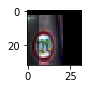

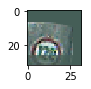

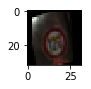

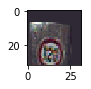

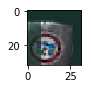

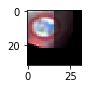

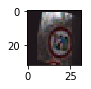

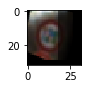

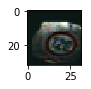

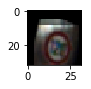

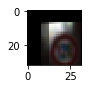

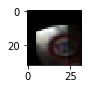

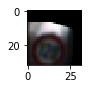

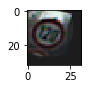

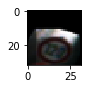

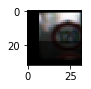

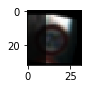

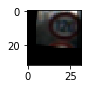

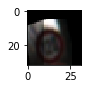

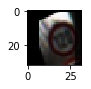

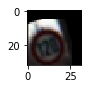

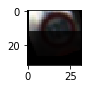

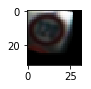

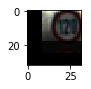

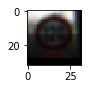

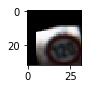

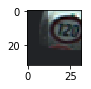

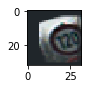

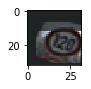

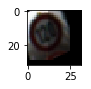

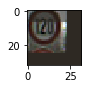

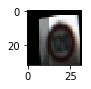

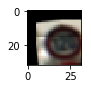

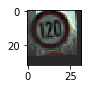

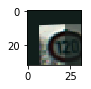

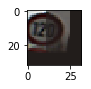

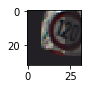

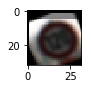

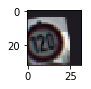

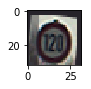

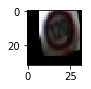

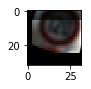

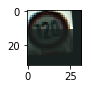

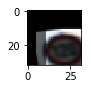

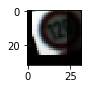

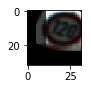

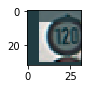

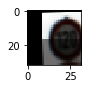

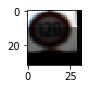

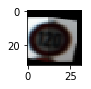

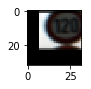

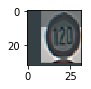

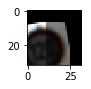

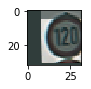

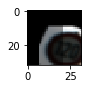

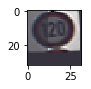

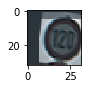

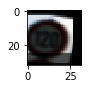

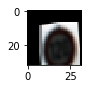

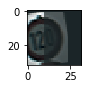

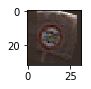

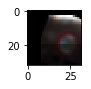

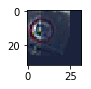

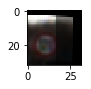

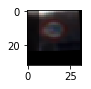

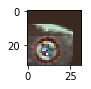

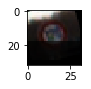

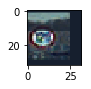

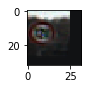

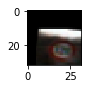

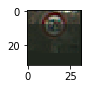

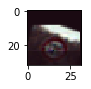

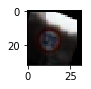

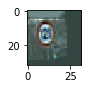

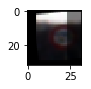

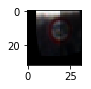

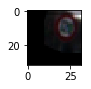

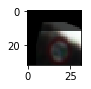

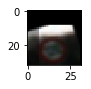

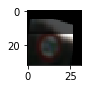

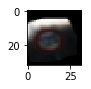

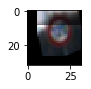

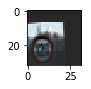

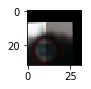

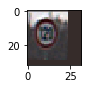

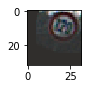

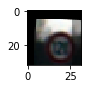

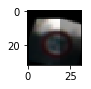

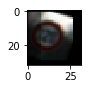

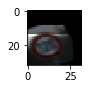

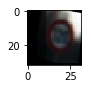

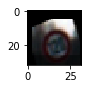

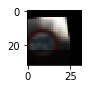

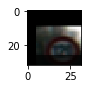

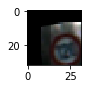

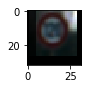

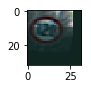

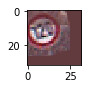

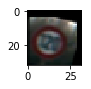

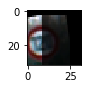

In [13]:
# display augmented image
plt.imshow(X_augment[2176])
plt.show()
print(X_augment[2176][:,:,1])
class_img_display(X_augment, y_augment, 100, 8, 'Training')

(168833, 32, 32, 3)
(168833,)


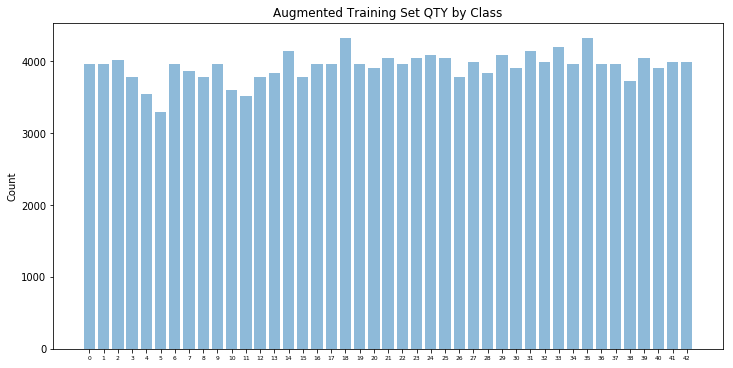

In [14]:
# concatenate training and augmented data, display total quantity, and display quantity by class
X_augment = np.array(X_augment)
y_augment = np.array(y_augment)
X_train_norm = np.concatenate((X_train_norm, X_augment))
y_train = np.concatenate((y_train, y_augment))
print(X_train_norm.shape)
print(y_train.shape)
_ = class_count(y_train, len(y_train), 'Augmented Training')

In [15]:
# Shuffle data
from sklearn.utils import shuffle
X_train_norm, y_train = shuffle(X_train_norm, y_train)

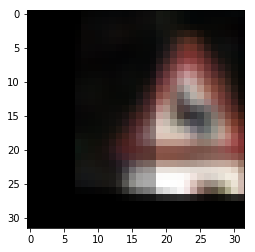

1.0

In [16]:
plt.imshow(X_train_norm[63])
plt.show()
X_train_norm[63][:,:,2].max()

Training image samples:


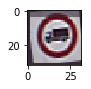

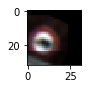

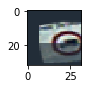

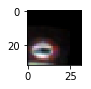

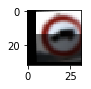

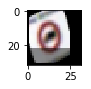

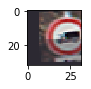

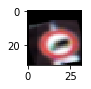

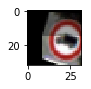

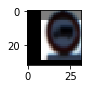

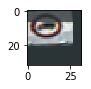

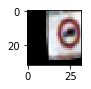

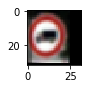

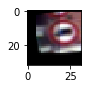

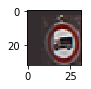

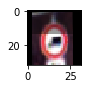

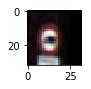

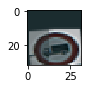

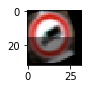

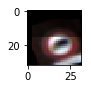

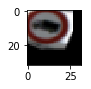

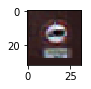

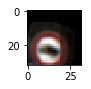

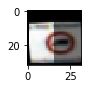

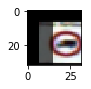

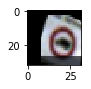

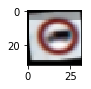

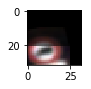

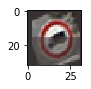

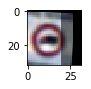

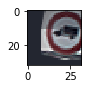

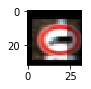

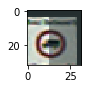

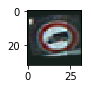

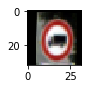

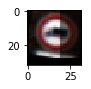

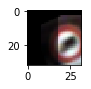

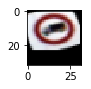

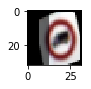

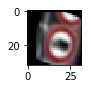

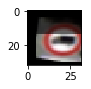

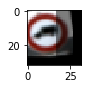

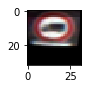

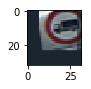

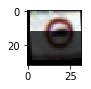

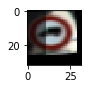

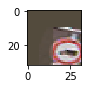

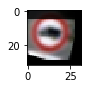

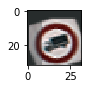

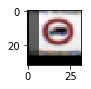

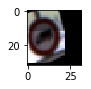

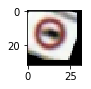

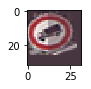

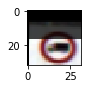

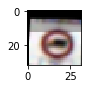

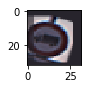

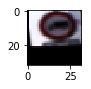

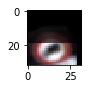

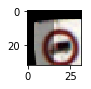

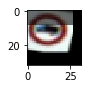

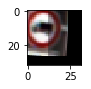

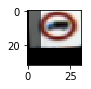

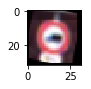

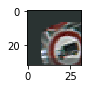

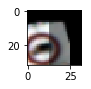

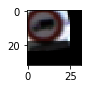

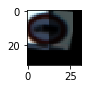

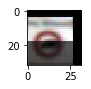

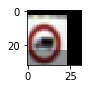

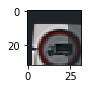

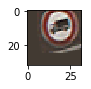

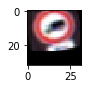

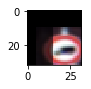

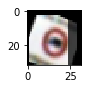

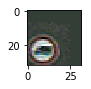

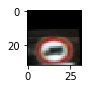

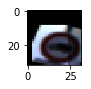

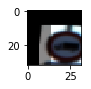

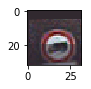

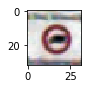

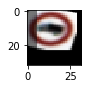

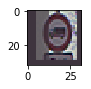

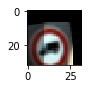

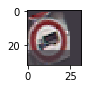

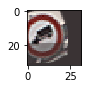

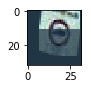

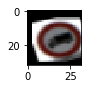

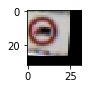

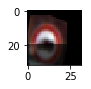

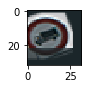

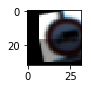

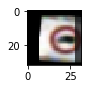

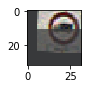

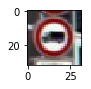

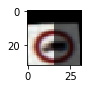

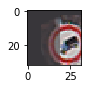

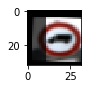

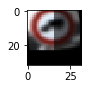

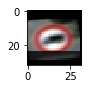

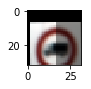

In [17]:
class_img_display(X_train_norm, y_train, 100, 16, 'Training')

### Model Architecture

In [18]:
### Define your architecture here.
### Feel free to use as many code cells as needed.
import tensorflow as tf

EPOCHS = 6
BATCH_SIZE = 128

In [19]:
# Class incepNet contains scaled down inception neural network v4
# Reference: https://arxiv.org/pdf/1602.07261.pdf
from inception import incepNet

In [20]:
# Generate an object to store all weights for regularization
all_Wb = incepNet()

In [21]:
# Define top level structure of the neural network (inception v4)
from tensorflow.contrib.layers import flatten
def inNet(x):
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1
    in_size = [rows,cols,channels]
    features, in_size = all_Wb.stem(x, in_size)
    print(in_size)
    features, in_size = all_Wb.inception_A(features, in_size)
    print(in_size)
    features, in_size = all_Wb.reduction_A(features, in_size)
    print(in_size)
    features, in_size = all_Wb.inception_B(features, in_size)
    print(in_size)
    features, in_size = all_Wb.reduction_B(features, in_size)
    print(in_size)
    features, in_size = all_Wb.inception_C(features, in_size)
    print(in_size)
    param = ([1,in_size[0],in_size[1],1], [1,1,1,1])
    pooling = tf.nn.avg_pool(features, ksize=param[0], strides = param[1], padding='VALID')
    pooling = tf.nn.dropout(pooling, all_Wb.keep_prob)
    pooling = tf.reshape(pooling, [-1, in_size[2]])
    last_W = tf.Variable(tf.truncated_normal([in_size[2],43], mean=mu, stddev=sigma), name='weight_last')
    last_b = tf.Variable(tf.truncated_normal([43], mean=mu, stddev=sigma), name='bias_last')
    all_Wb.all_weights.append(last_W)
    last_layer = tf.matmul(pooling, last_W)
    logits = tf.add(last_layer, last_b)
    return logits

In [22]:
# Placeholders
x = tf.placeholder(tf.float32, (None, 32, 32, 3))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, 43)

In [23]:
print(all_Wb.keep_prob)

Tensor("Placeholder:0", dtype=float32)


In [24]:
# alpha = learning rate
# beta = regularization factor
alpha = tf.placeholder(tf.float32)
beta = 0.001
reg = 0
logits = inNet(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=logits)
loss_operation = tf.reduce_mean(cross_entropy)
for weight in all_Wb.all_weights:
    reg += tf.nn.l2_loss(weight)

loss_operation = tf.reduce_mean(loss_operation + beta * reg)
optimizer = tf.train.AdamOptimizer(learning_rate = alpha)
training_operation = optimizer.minimize(loss_operation)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
[16, 16, 224]
[16, 16, 256]
[8, 8, 384]
[8, 8, 184]
[3, 3, 284]
[3, 3, 288]
Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.



In [25]:
# Evaluate data set
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()
save_file = './innet_model2.ckpt'
def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y, all_Wb.keep_prob: 1.0})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

In [26]:
# Evaluate accuracy by class
def evaluate_class(X_data, y_data):
    num_examples = len(X_data)
    correct_y = [0] * 43
    sess = tf.get_default_session()
    for i in range(0, num_examples, num_examples):
        single_x, single_y = X_data[i:i+num_examples], y_data[i:i+num_examples]
        pred_label = sess.run(tf.argmax(logits, 1), feed_dict={x: single_x, all_Wb.keep_prob: 1.0})
        for j in range(num_examples):
            if pred_label[j] == y_data[j]:
                correct_y[pred_label[j]] = correct_y[pred_label[j]] + 1

    return correct_y

In [27]:
# Evaluate accuracy by class
def evaluate_precision(X_data, y_data):
    num_examples = len(X_data)
    correct_y = [0] * 43
    incorrect_y = [0] * 43
    sess = tf.get_default_session()
    for i in range(0, num_examples, num_examples):
        single_x, single_y = X_data[i:i+num_examples], y_data[i:i+num_examples]
        pred_label = sess.run(tf.argmax(logits, 1), feed_dict={x: single_x, all_Wb.keep_prob: 1.0})
        for j in range(num_examples):
            if pred_label[j] == y_data[j]:
                correct_y[pred_label[j]] = correct_y[pred_label[j]] + 1
            else:
                incorrect_y[pred_label[j]] = incorrect_y[pred_label[j]] + 1
    return np.array(correct_y)/(np.array(correct_y) + np.array(incorrect_y))

In [28]:
# Evaluate accuracy by class
class_pred = tf.argmax(logits, 1)
def evaluate_class_serial(X_data, y_data):
    num_examples = len(X_data)
    correct_y = []
    sess = tf.get_default_session()
    for i in range(0, num_examples, 1):
        single_x, single_y = X_data[i:i+1], y_data[i:i+1]
        predict = sess.run(class_pred, feed_dict={x: single_x, y: single_y, all_Wb.keep_prob: 1.0})
        correct_y.append(predict)

    return correct_y

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [30]:
### Train your model here.
### Calculate and report the accuracy on the training and validation set.
### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.
### Feel free to use as many code cells as needed.
learn_rate_fac = 0.02
default_learn_rate = 0.002
import os
with tf.Session() as sess:
    # load trained model if file exists
    exists = os.path.isfile('innet_model2.ckpt.index')
    if exists:
        saver.restore(sess, save_file)
        train_accuracy = evaluate(X_train_norm, y_train)
        dyn_alpha = min((1 - train_accuracy)*learn_rate_fac, default_learn_rate)
    else:
        sess.run(tf.global_variables_initializer())
        dyn_alpha = default_learn_rate
    num_examples = len(X_train_norm)
    accuracy_list = []
    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train_norm, y_train = shuffle(X_train_norm, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train_norm[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y, alpha: dyn_alpha, all_Wb.keep_prob: 0.8})
        
        validation_accuracy = evaluate(X_valid_norm, y_valid)
        train_accuracy = evaluate(X_train_norm, y_train)
        accuracy_list.append(validation_accuracy)
        print("EPOCH {} ...".format(i+1))
        print("Learning Rate = {:.6f}".format(dyn_alpha))
        print("Train Accuracy = {:.6f}".format(train_accuracy))
        print("Validation Accuracy = {:.6f}".format(validation_accuracy))
        print()
        dyn_alpha = min((1 - train_accuracy)*learn_rate_fac, default_learn_rate)
        
    saver.save(sess, save_file)
    print("Model saved")

INFO:tensorflow:Restoring parameters from ./innet_model2.ckpt
Training...

EPOCH 1 ...
Learning Rate = 0.000177
Train Accuracy = 0.989759
Validation Accuracy = 0.990249

EPOCH 2 ...
Learning Rate = 0.000205
Train Accuracy = 0.992875
Validation Accuracy = 0.990249

EPOCH 3 ...
Learning Rate = 0.000143
Train Accuracy = 0.993076
Validation Accuracy = 0.988889

EPOCH 4 ...
Learning Rate = 0.000138
Train Accuracy = 0.994539
Validation Accuracy = 0.990930

EPOCH 5 ...
Learning Rate = 0.000109
Train Accuracy = 0.994397
Validation Accuracy = 0.990930

EPOCH 6 ...
Learning Rate = 0.000112
Train Accuracy = 0.995078
Validation Accuracy = 0.990476

Model saved


INFO:tensorflow:Restoring parameters from ./innet_model2.ckpt


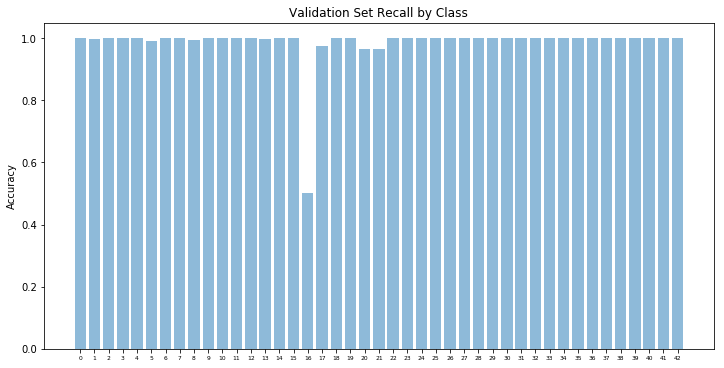

In [32]:
# Load trained model and list validation set precision by class
import tensorflow as tf
with tf.Session() as sess:
    saver.restore(sess, save_file)
    y_val_list = evaluate_class(X_valid_norm, y_valid)

y_val_list = np.float32(np.array(y_val_list)/np.array(valid_label_list))
bar_chart(y_val_list, class_list, 'Accuracy', 'Validation Set Recall by Class')

INFO:tensorflow:Restoring parameters from ./innet_model2.ckpt


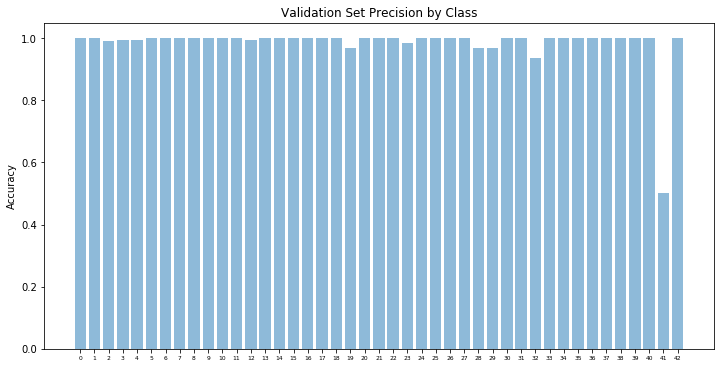

In [33]:
# Validation set precision
with tf.Session() as sess:
    saver.restore(sess, save_file)
    y_val_rec = evaluate_precision(X_valid_norm, y_valid)
bar_chart(y_val_rec, class_list, 'Accuracy', 'Validation Set Precision by Class')

Validation class 16 image samples:


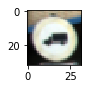

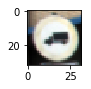

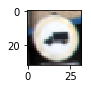

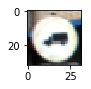

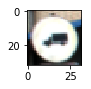

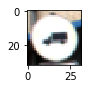

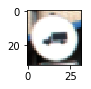

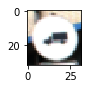

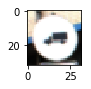

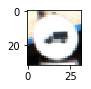

Validation class 41 image samples:


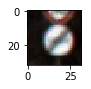

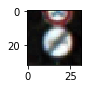

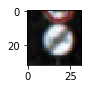

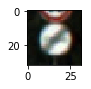

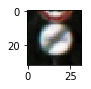

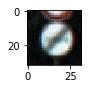

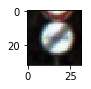

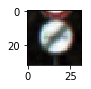

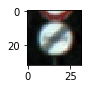

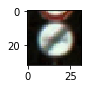

In [34]:
class_img_display(X_valid_norm, y_valid, 10, 16, 'Validation class 16')
class_img_display(X_valid_norm, y_valid, 10, 41, 'Validation class 41')

In [35]:
# Load trained model and check for test set accuracy
import tensorflow as tf
save_file = './innet_model2.ckpt'
saver = tf.train.Saver()
with tf.Session() as sess:
    saver.restore(sess, save_file)

    test_accuracy = evaluate(X_test_norm, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))


INFO:tensorflow:Restoring parameters from ./innet_model2.ckpt
Test Accuracy = 0.984


INFO:tensorflow:Restoring parameters from ./innet_model2.ckpt


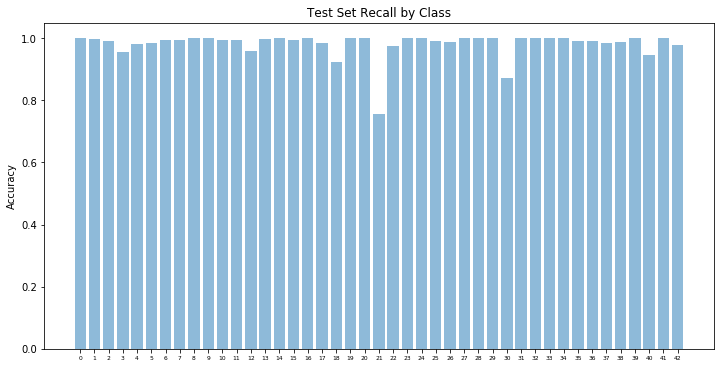

In [36]:
# Load trained model and list test set precision by class
with tf.Session() as sess:
    saver.restore(sess, save_file)
    y_test_list = evaluate_class(X_test_norm, y_test)

y_test_list = np.float32(np.array(y_test_list)/np.array(test_label_list))

bar_chart(y_test_list, class_list, 'Accuracy', 'Test Set Recall by Class')

INFO:tensorflow:Restoring parameters from ./innet_model2.ckpt


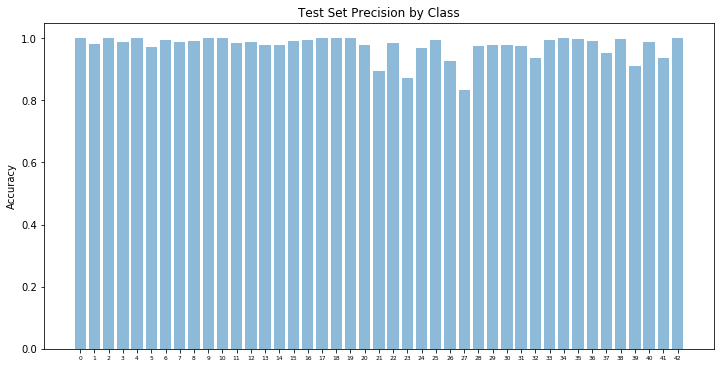

In [52]:
# Test set precision
with tf.Session() as sess:
    saver.restore(sess, save_file)
    y_test_rec = evaluate_precision(X_test_norm, y_test)
bar_chart(y_test_rec, class_list, 'Accuracy', 'Test Set Precision by Class')

Validation class 27 image samples:


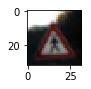

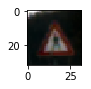

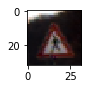

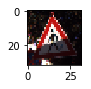

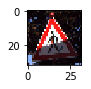

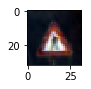

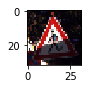

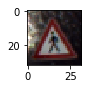

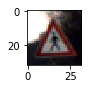

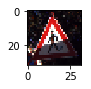

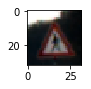

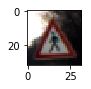

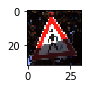

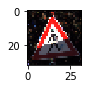

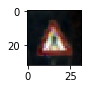

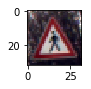

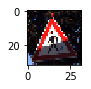

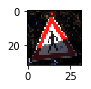

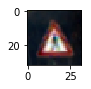

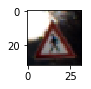

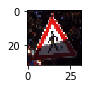

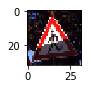

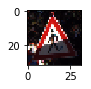

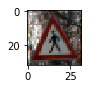

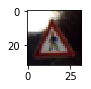

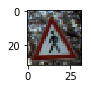

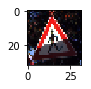

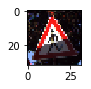

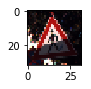

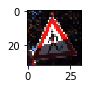

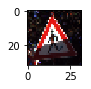

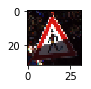

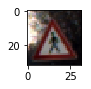

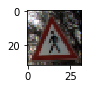

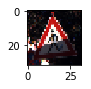

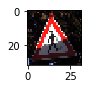

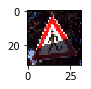

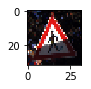

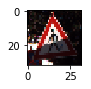

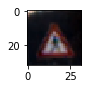

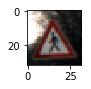

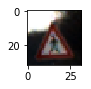

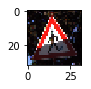

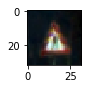

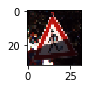

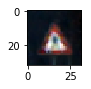

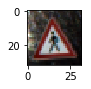

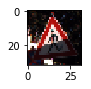

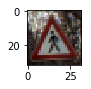

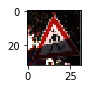

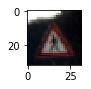

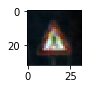

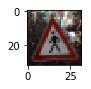

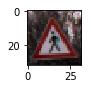

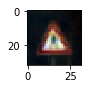

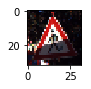

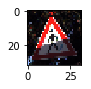

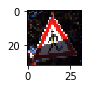

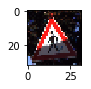

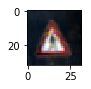

In [38]:
class_img_display(X_test_norm, y_test, 60, 27, 'Validation class 27')

---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

(488, 606, 3)


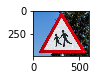

(712, 887, 3)


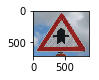

(672, 727, 3)


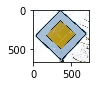

(393, 381, 3)


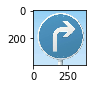

(415, 489, 3)


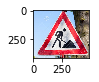

In [39]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.
import glob
images = glob.glob('../images/*.jpg')
for idx, fname in enumerate(images):
    ppm_img = plt.imread(fname)
    print(ppm_img.shape)
    plt.figure(figsize=(1,1))
    plt.imshow(ppm_img)
    plt.show()

### Predict the Sign Type for Each Image

In [40]:
# Read csv file
import csv
sign = [0]*43
with open('signnames.csv', mode='r') as csv_file:
    csv_reader = csv.DictReader(csv_file)
    line_count = 0
    for row in csv_reader:
        if line_count == 0:
            line_count += 1
        sign[np.int32(row["ClassId"])] = row["SignName"]
        line_count += 1
    print(f'Processed {line_count} lines.')

Processed 44 lines.


In [41]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.
images = glob.glob('../images/*.jpg')
X_new = []
for idx, fname in enumerate(images):
    ppm_img = plt.imread(fname)
    temp = cv2.resize(ppm_img,(32, 32), interpolation = cv2.INTER_LINEAR)
    X_new.append(temp)
X_new = normalize_img(np.array(X_new))
y_new = [28, 11, 12, 33, 25]

INFO:tensorflow:Restoring parameters from ./innet_model2.ckpt
Children crossing


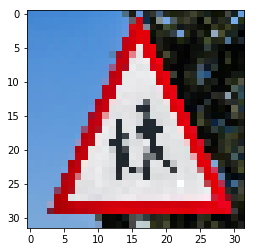

Right-of-way at the next intersection


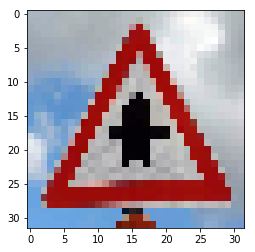

Priority road


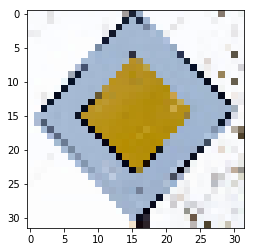

Turn right ahead


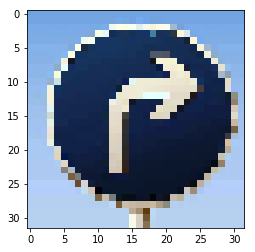

Road work


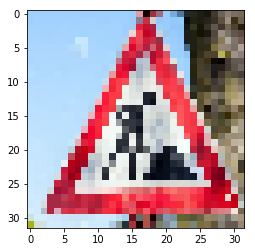

In [42]:
# Load trained model and predict sign labels
import tensorflow as tf
with tf.Session() as sess:
    saver.restore(sess, save_file)
    y_val_list = evaluate_class_serial(X_new, y_new)
for i in range(len(X_new)):
    print(sign[y_val_list[i][0]])
    plt.imshow(X_new[i])
    plt.show()


### Analyze Performance

In [43]:
### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.
# Load trained model and check for new set accuracy
import tensorflow as tf
saver = tf.train.Saver()
with tf.Session() as sess:
    saver.restore(sess, save_file)

    new_accuracy = evaluate(X_new, y_new)
    print("Test Accuracy = {:.3f}".format(new_accuracy))


INFO:tensorflow:Restoring parameters from ./innet_model2.ckpt
Test Accuracy = 1.000


### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tf.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

INFO:tensorflow:Restoring parameters from ./innet_model2.ckpt


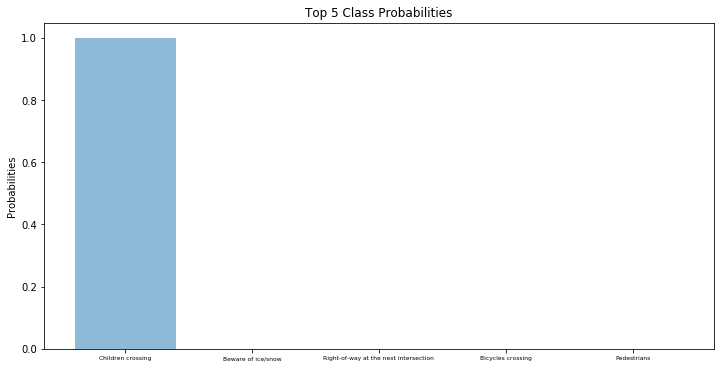

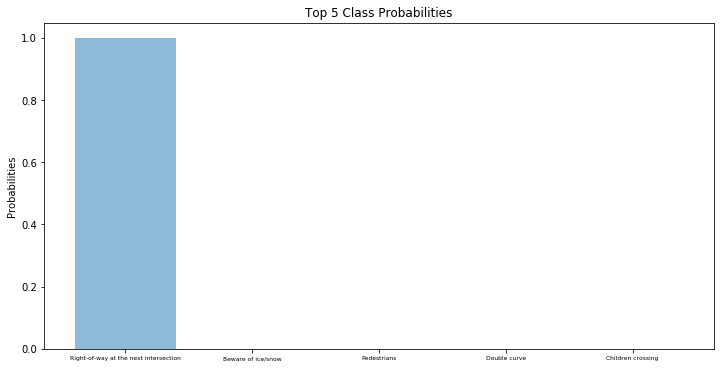

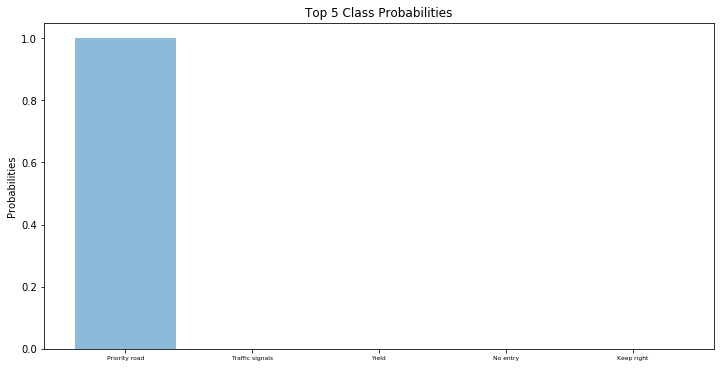

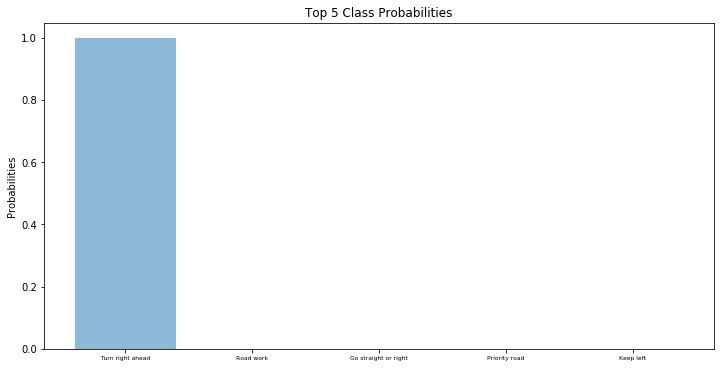

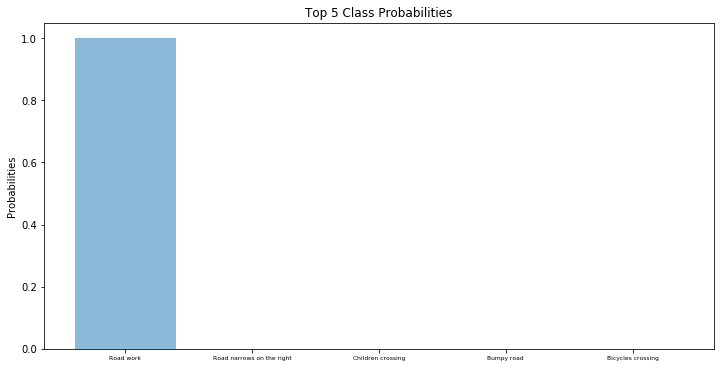

In [44]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.
from scipy.special import softmax
saver = tf.train.Saver()

with tf.Session() as sess:
    saver.restore(sess, save_file)
    num_examples = 5
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, 1):
        batch_x, batch_y = X_new[offset:offset+1], y_new[offset:offset+1]
        softmax_list = softmax(sess.run(logits, feed_dict={x: batch_x, y: batch_y, all_Wb.keep_prob: 1.0}))
        result = sess.run(tf.nn.top_k(tf.constant(softmax_list), k=5))
        plt_class = []
        for i in range(5):
            plt_class.append(sign[result[1][0][i]])
        x_pos = result[0][0]
        bar_chart(x_pos, plt_class, 'Probabilities', 'Top 5 Class Probabilities', xticks=False)

### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

---

## Step 4 (Optional): Visualize the Neural Network's State with Test Images

 This Section is not required to complete but acts as an additional excersise for understaning the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

 Provided for you below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the [LeNet lab's](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) feature maps looked like for it's second convolutional layer you could enter conv2 as the tf_activation variable.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper [End-to-End Deep Learning for Self-Driving Cars](https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/) in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.

<figure>
 <img src="visualize_cnn.png" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above)</p> 
 </figcaption>
</figure>
 <p></p> 


In [45]:
### Visualize your network's feature maps here.
### Feel free to use as many code cells as needed.

# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry

def outputFeatureMap(image_input, tf_activation, activation_min=-1, activation_max=-1 ,plt_num=1):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    # image_input =
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it may be having trouble accessing the variable from inside a function
    #sess = tf.get_default_session()
    #activation = tf_activation.eval(session=sess,feed_dict={x : image_input})
    activation = sess.run(tf_activation, feed_dict={x : image_input, all_Wb.keep_prob : 1.0})

    featuremaps = activation.shape[3]
    plt.figure(plt_num, figsize=(40,40))
    for featuremap in range(featuremaps):
        plt.subplot(20,10, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.title('Filter ' + str(featuremap), fontsize=9) # displays the feature map number
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")

In [46]:
len(all_Wb.layer_features)

47

INFO:tensorflow:Restoring parameters from ./innet_model2.ckpt


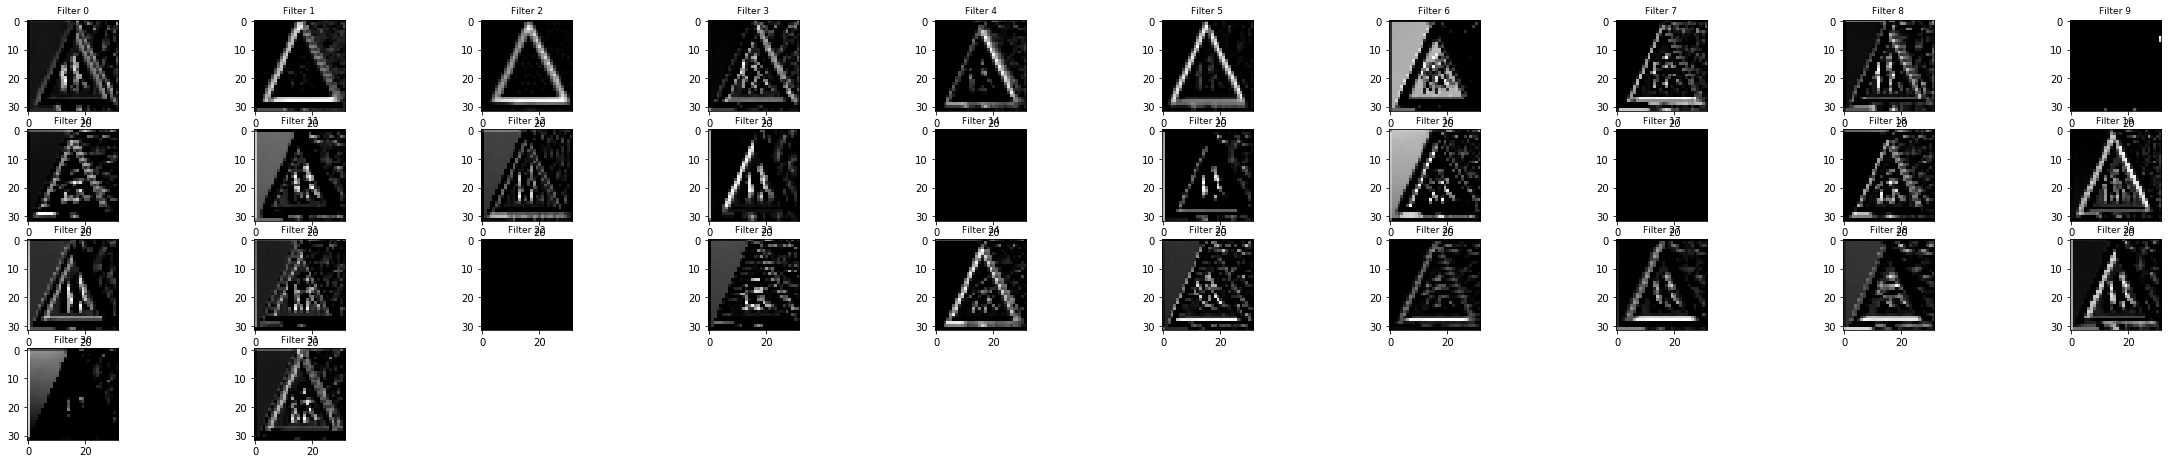

In [47]:
# First layer feature
with tf.Session() as sess:
    saver.restore(sess, save_file)
    outputFeatureMap(X_new[0:1], all_Wb.layer_features[0])

INFO:tensorflow:Restoring parameters from ./innet_model2.ckpt


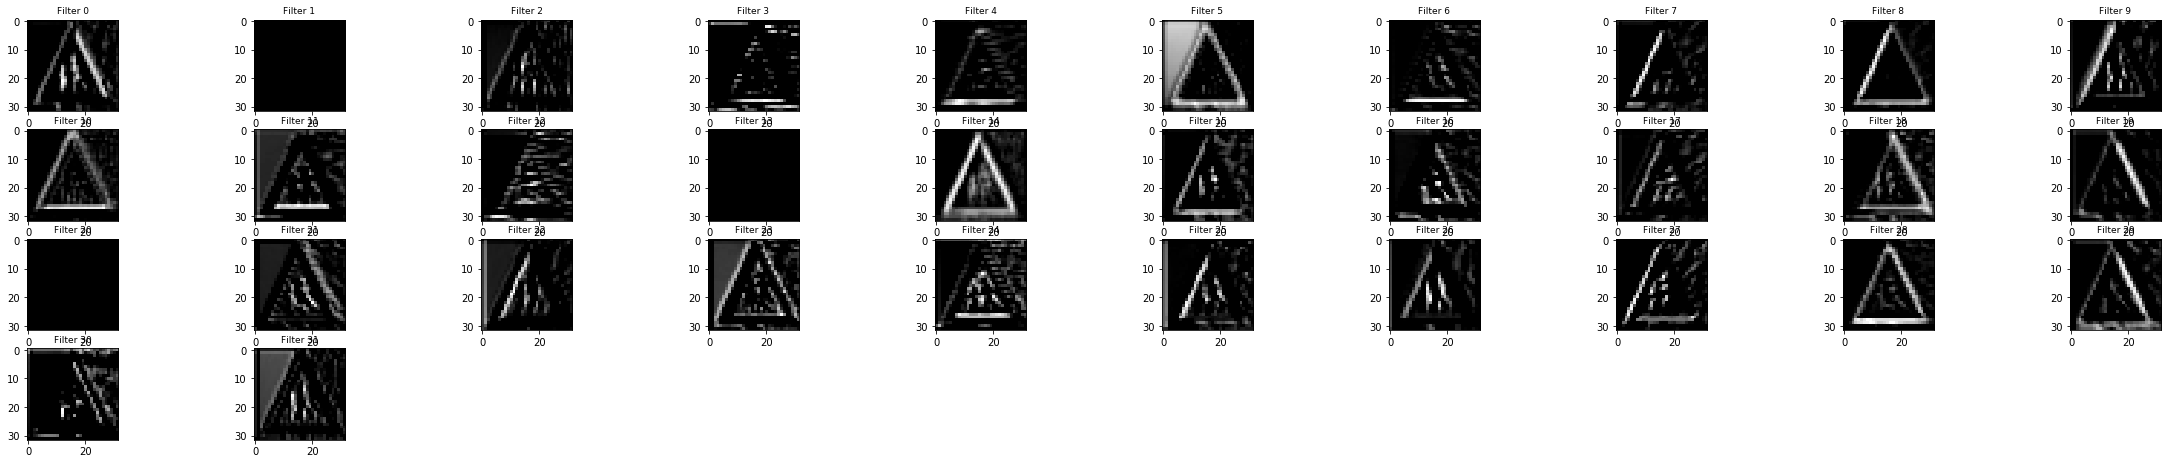

In [48]:
# Second layer feature
with tf.Session() as sess:
    saver.restore(sess, save_file)
    outputFeatureMap(X_new[0:1], all_Wb.layer_features[1])

INFO:tensorflow:Restoring parameters from ./innet_model2.ckpt


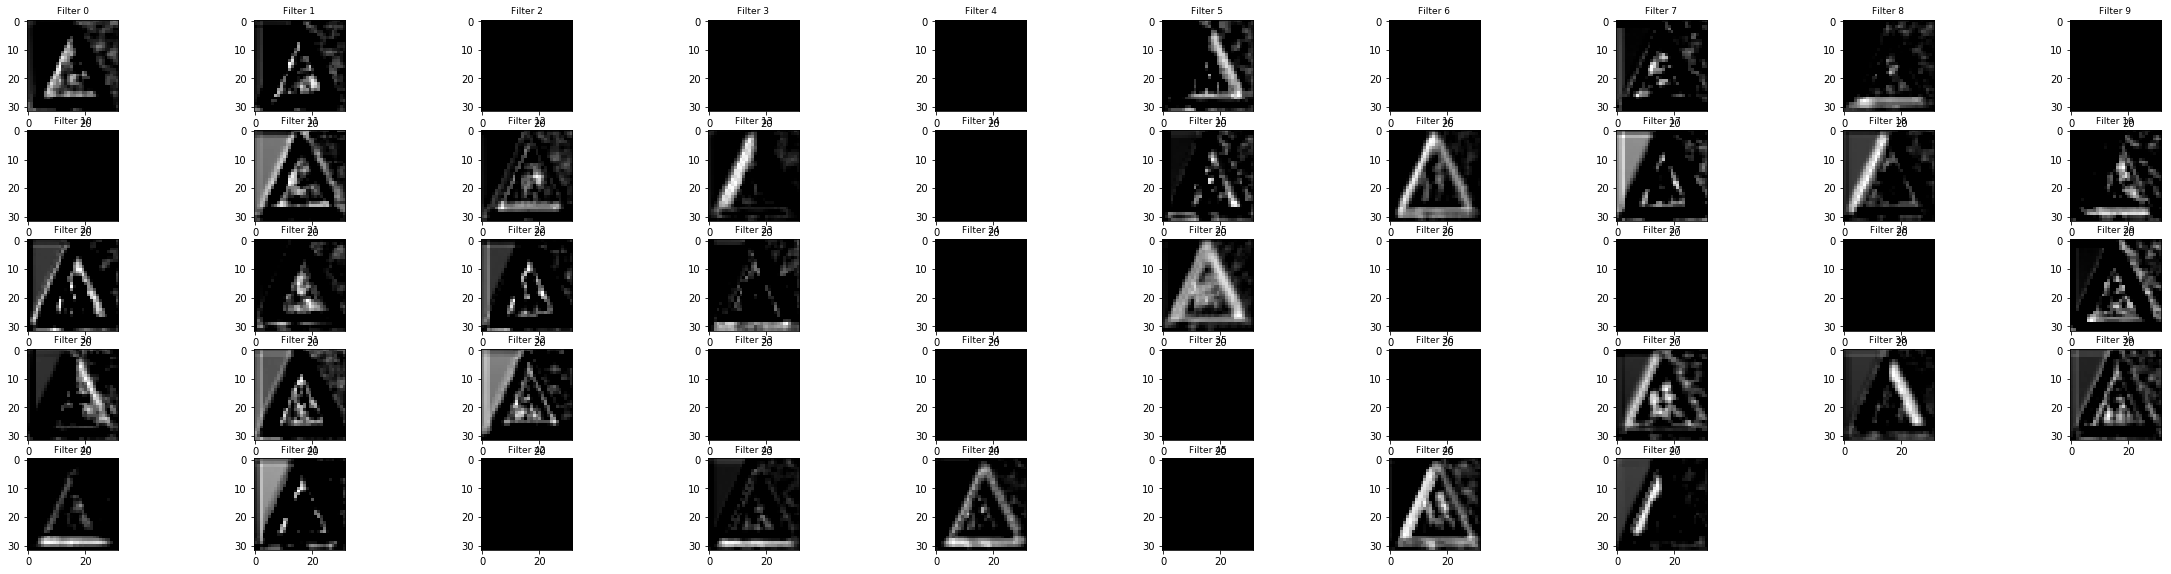

In [49]:
# Fourth layer feature
with tf.Session() as sess:
    saver.restore(sess, save_file)
    outputFeatureMap(X_new[0:1], all_Wb.layer_features[3])

INFO:tensorflow:Restoring parameters from ./innet_model2.ckpt


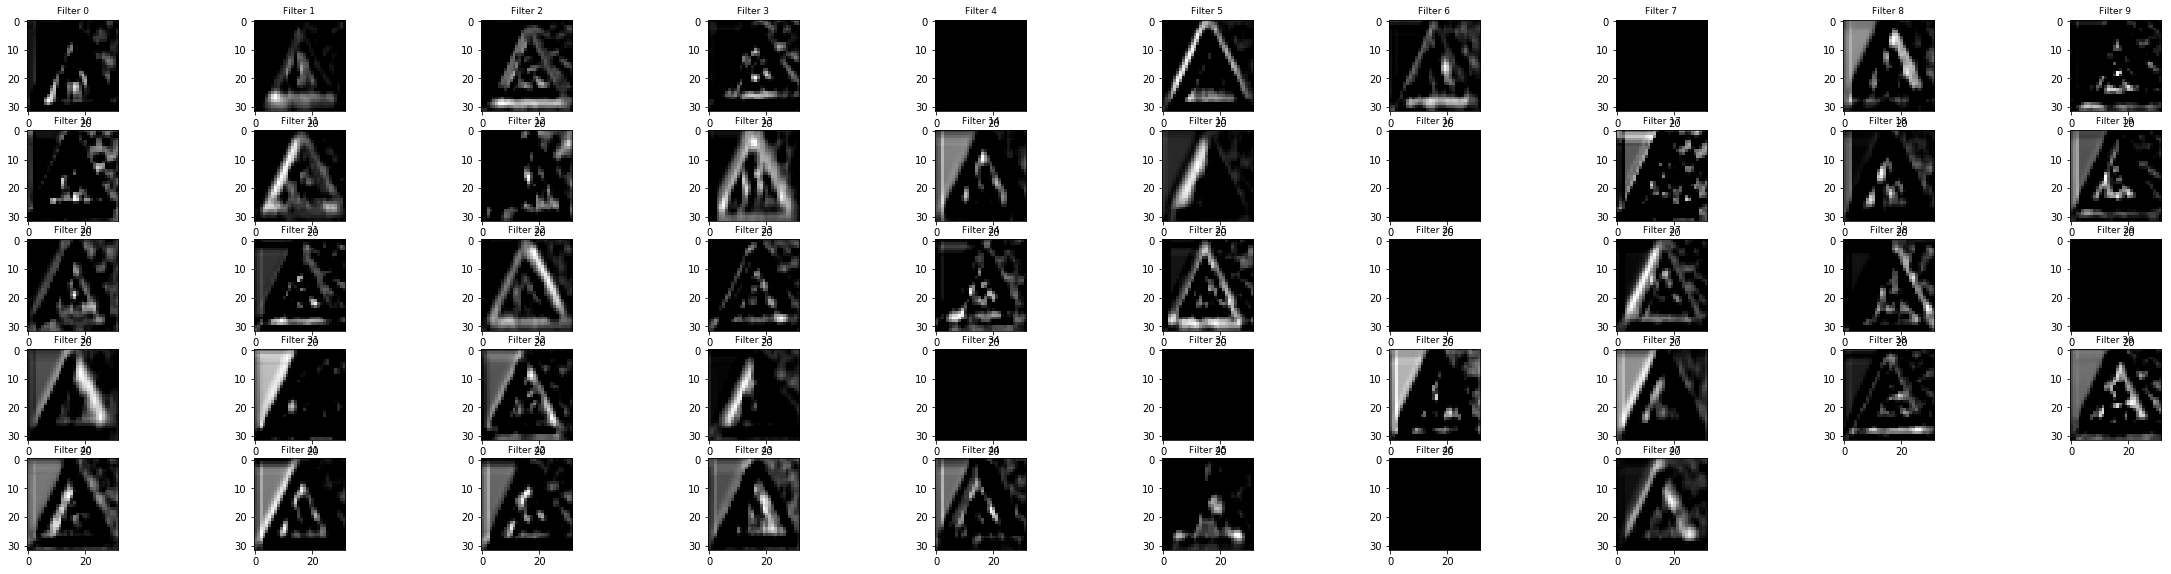

In [50]:
# Fifth layer feature
with tf.Session() as sess:
    saver.restore(sess, save_file)
    outputFeatureMap(X_new[0:1], all_Wb.layer_features[4])

INFO:tensorflow:Restoring parameters from ./innet_model2.ckpt


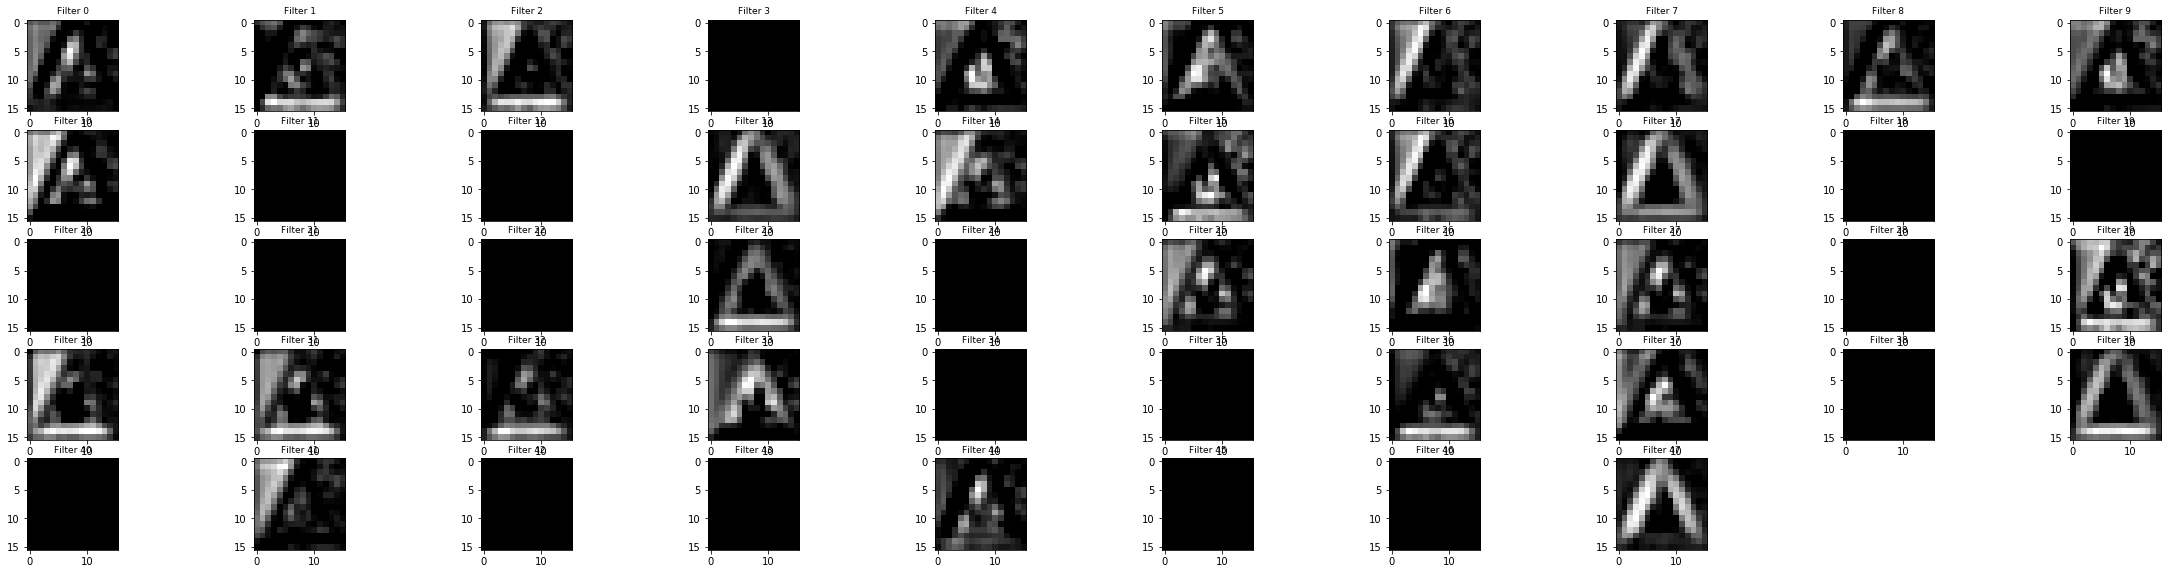

In [51]:
# 11th layer feature
with tf.Session() as sess:
    saver.restore(sess, save_file)
    outputFeatureMap(X_new[0:1], all_Wb.layer_features[10])